/srv/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:618: DataConversionWarning: A column-vector y was passed when a 1d array wa

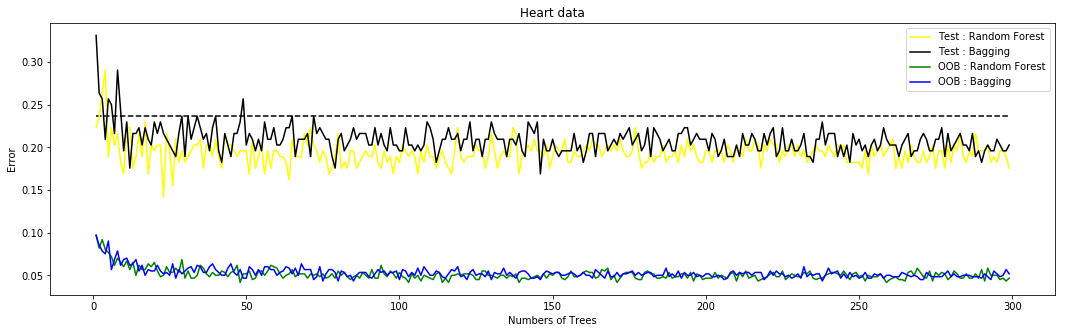

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection
from sklearn.metrics import confusion_matrix , accuracy_score
from  sklearn.metrics import mean_squared_error 
from sklearn.metrics.scorer import make_scorer
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('processed.cleveland.data')
data = data[data != '?']
data.dropna(inplace=True)
data=data.values

Y=data[:,13].reshape(-1,1)
X=data[:,0:13]
#Y = preprocessing.scale(Y)
X=preprocessing.scale(X)
Y=Y.astype('float')
X=X.astype('float')

ii=Y>0.0
Y[ii]=1.0

error_bagging=[]
error_rforest=[]
error_OOBbagging=[]
error_OOBforest=[]
sct = []
n_of_trees=[]


X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.5)




for i in range(1,300):
    n_of_trees.append(i)
    rf=sklearn.ensemble.RandomForestClassifier(n_estimators=i,oob_score=True)
    rf.fit(X_train,Y_train)
    rf_predict=rf.predict(X_test)
    error_rforest.append(sklearn.metrics.mean_squared_error(Y_test, rf_predict))
    error_OOBforest.append((1.0-rf.oob_score_)*(np.sum((Y_test - np.mean(Y_test)) ** 2)/len(Y_test)))
    
    
    bg=sklearn.ensemble.BaggingClassifier( n_estimators=i,oob_score=True)
    bg.fit(X_train,Y_train)
    bg_predict=bg.predict(X_test)
    error_bagging.append(sklearn.metrics.mean_squared_error(Y_test, bg_predict))
    error_OOBbagging.append((1.0-bg.oob_score_)*(np.sum((Y_test - np.mean(Y_test)) ** 2)/len(Y_test)))
    
error_bagging= np.asarray(error_bagging)
error_rforest= np.asarray(error_rforest)
error_OOBbagging= np.asarray(error_OOBbagging)
error_OOBforest= np.asarray(error_OOBforest)
n_of_trees= np.asarray(n_of_trees)

regressor=sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=1)
regressor.fit(X_train,Y_train)
sct=np.zeros((299))
oo=sct==0.0
sct[oo]=sklearn.metrics.mean_squared_error(Y_test,regressor.predict(X_test))

plt.figure(figsize=[18,5])
plt.plot(n_of_trees,sct,'--',color='k')
plt.plot(n_of_trees,error_rforest,label="Test : Random Forest",color='yellow')
plt.plot(n_of_trees,error_bagging,label="Test : Bagging",color='k')
plt.plot(n_of_trees,error_OOBforest,label="OOB : Random Forest",color='green')
plt.plot(n_of_trees,error_OOBbagging,label="OOB : Bagging",color='blue')
plt.title('Heart data')
plt.xlabel('Numbers of Trees')
plt.ylabel('Error')
plt.savefig('Figura_88.pdf')
plt.legend()

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3

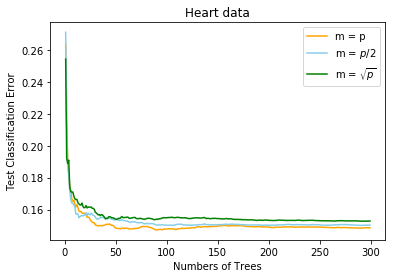

In [4]:
data = pd.read_csv('OJ.csv')
data=data.dropna()
Y=data['Purchase'].values.reshape(-1,1)
X=data[['WeekofPurchase','StoreID','PriceCH','PriceMM','DiscCH','DiscMM','SpecialCH','SpecialMM','LoyalCH','SalePriceMM','SalePriceCH','PriceDiff','PctDiscMM','PctDiscCH','ListPriceDiff','STORE']].values

for i in range(len(Y)):
    if(Y[i]=='CH'):
        Y[i]=0.0
    else:
        Y[i]=1.0

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, test_size=0.5)

tce_p = []
tce_p_2 = []
tce_p_sqrt = []
n_of_trees=[]

for i in range(1,500):
    n_of_trees.append(i)
    p=sklearn.ensemble.RandomForestRegressor(n_estimators=i,warm_start=True, oob_score=True,max_features=None,bootstrap=True,random_state=300, min_samples_leaf=1)
    p.fit(X_train, Y_train)
    p_predict=p.predict(X_test)
    tce_p.append(sklearn.metrics.mean_squared_error(Y_test,p_predict))
    
    p_2=sklearn.ensemble.RandomForestRegressor(n_estimators=i,warm_start=True, oob_score=True,max_features=0.5,bootstrap=True,random_state=300, min_samples_leaf=1)
    p_2.fit(X_train, Y_train)
    p_2_predict=p_2.predict(X_test)
    tce_p_2.append(sklearn.metrics.mean_squared_error(Y_test,p_2_predict))
    
    p_sqrt=sklearn.ensemble.RandomForestRegressor(n_estimators=i,warm_start=True, oob_score=True,max_features="sqrt",bootstrap=True,random_state=300, min_samples_leaf=1)
    p_sqrt.fit(X_train, Y_train)
    p_sqrt_predict=p_sqrt.predict(X_test)
    tce_p_sqrt.append(sklearn.metrics.mean_squared_error(Y_test,p_sqrt_predict))
    

plt.plot(n_of_trees,tce_p ,label = 'm = p',color='orange')
plt.plot(n_of_trees,tce_p_2 ,label = r'm = $p/2$',color='skyblue')
plt.plot(n_of_trees,tce_p_sqrt ,label = 'm = $\sqrt{p}$',color='green')
plt.title('Heart data')
plt.xlabel('Numbers of Trees')
plt.ylabel('Test Classification Error')
plt.savefig('Figura_810.pdf')
plt.legend()
